<a href="https://colab.research.google.com/github/LarsonBodden/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Larson Bodden 

- Project 2
- 8/7/22

## Project Part 1

1) Source of data
- https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model

2) Brief description of data
- This data contain the information of the various people with the following detail which can help us to find out the better prediction and also help us to train our model to predict the correct value and get a good F1 Score.

3) What is the target?
- Car Purchase Amount

4) Is this a classification or regression problem?
- This is regression problem because i will be a predicting a discrete class label.

5) How many features?
- 6 features. I will also drop customer name and customer email because it does not add or change anything on the data set. 

6) How many rows of data.
- 500 Rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- I do not forsee any challenges

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import scipy.stats as stats


## Project Part 2

In [3]:
# Load data from csv file
filename = '/content/drive/MyDrive/Coding Dojo - Data Science Bootcamp/Colab Notebooks/Projects/Project 2/Car_Purchasing_Data.csv'
df = pd.read_csv(filename)
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

       Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

    Country  Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       USA       0   42 

In [5]:
# Drop unceccessary columns
df = df.drop(columns=['Customer Name', 'Customer e-mail', 'Country'])
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# identify and address missing values 
df.isna().sum()

Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

- No categorical values

In [8]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Car Purchase Amount'],axis=1),
                                                   df['Car Purchase Amount'],
                                                   test_size=0.2,
                                                   random_state=0)

x_train.shape, x_test.shape

((400, 5), (100, 5))

In [10]:
discrete_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and x_train[var].nunique() < 10]
continuous_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and var not in discrete_variable]

In [11]:
discrete_variable

['Gender']

In [12]:
continuous_variable

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [13]:
def diagnostic_plot(df, var):
    fig = plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    df[var].plot(kind='hist',bins=50)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    
    plt.show()

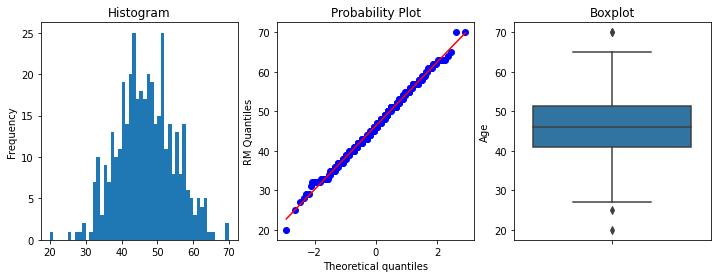

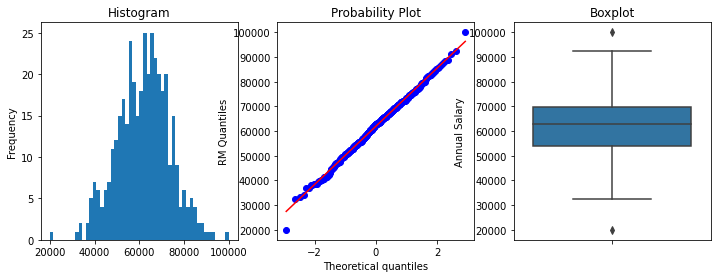

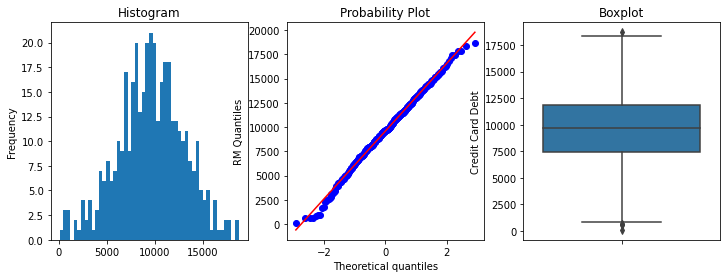

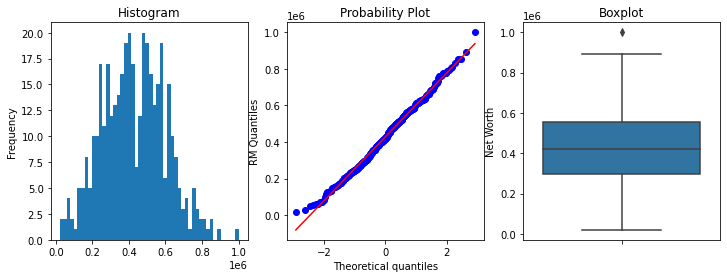

In [14]:
for var in continuous_variable:
    diagnostic_plot(x_train, var)

- We can see that our continuous variables are normally distributed because the values align to the 45 degree line of the Q-Q plot and except Net worth all the variables have outliers on both tails. Networth have outliers on right tail only.

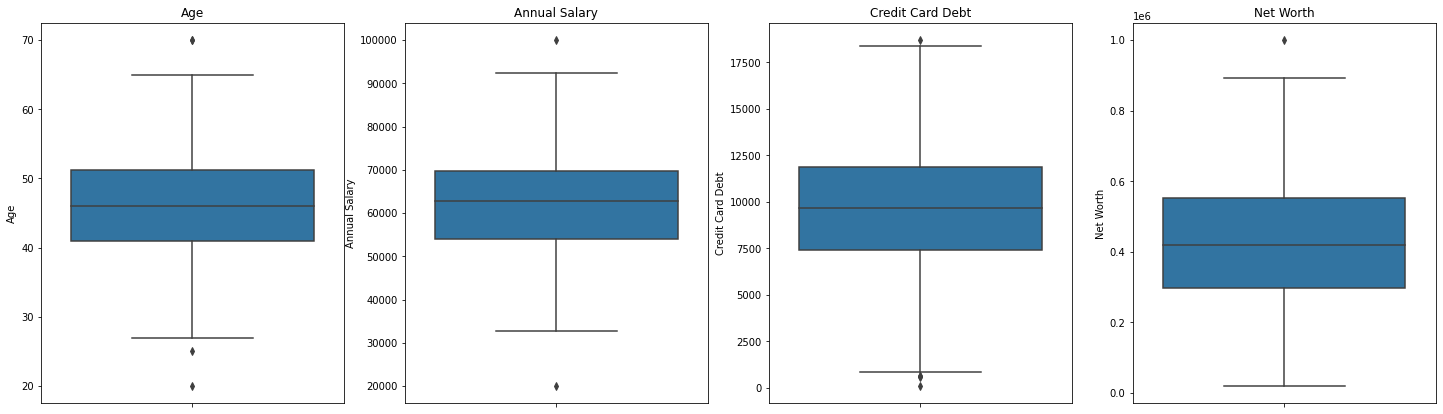

In [15]:
# we can directly use boxplot to visualize outliers.
# boxplots are standard way of displaying the distribution of a variable, utilising
# the first quantile, the median, the third quantile, and the whiskers

i = 1
fig = plt.figure(figsize=(25,7))

for var in continuous_variable:
    plt.subplot(1,4,i)
    sns.boxplot(y=x_train[var])
    plt.title(var)
    i = i + 1

## Project Part 3

In [17]:
# Scale the data
scaler = StandardScaler()
# Fit & transform data.
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()



,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,-1.012073,-0.529168,0.058576,0.574271,-1.110469,-0.825870
1,-1.012073,-0.654444,0.386570,-0.009951,0.573929,0.084157
2,0.988071,-0.403891,-0.712361,0.445452,1.193976,-0.119313
3,0.988071,1.475256,1.474794,1.382369,0.675595,2.156820
4,0.988071,1.349979,-0.205111,-1.218962,0.743113,1.087644


Text(0, 0.5, 'inertia')

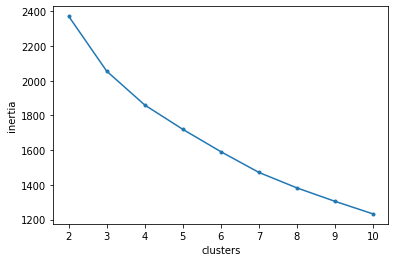

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(X_scaled)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

- In the above line plot we see that the graph starts to level off at 3 clusters.3 would be one candidate for a good number of clusters.

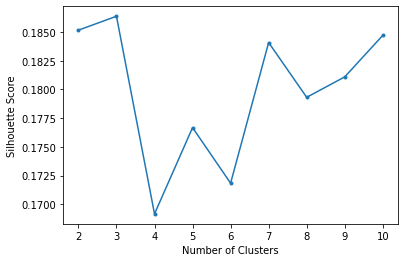

In [23]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_scaled)
  silhouette_scores.append(silhouette_score((X_scaled), kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

- We can see from the plot above that 3 would be the best number of clusters for our data since it has the highest Silhouette Score.

In [25]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
silhouette_score(X_scaled, kmeans.labels_)

0.18636991226424363

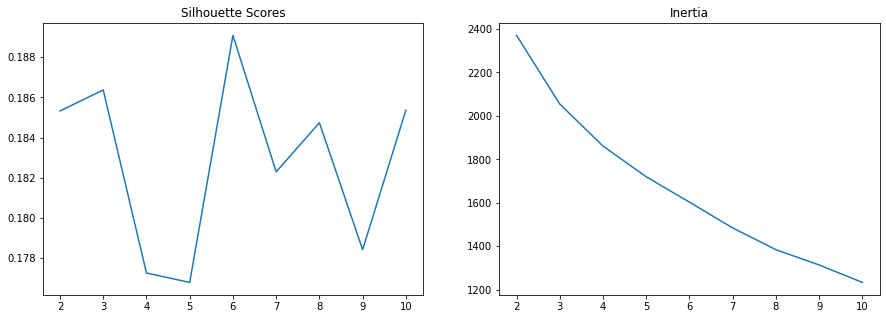

In [26]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);



- We can see that clustering the data into 6 groups gives us the best silhouette score and we can detect an elbow in the inertia plot at 3. 

In [27]:
# Refit KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()



,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,cluster
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877,5
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566,2
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921,4
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313,0
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248,0


In [28]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,1.000000,51.972973,72571.374554,10038.439742,481513.207930,56382.680720
1,1,0.272727,37.945455,47679.360826,8220.549767,415086.800505,28666.404787
2,2,0.000000,47.424242,68983.602648,8819.796643,570526.022170,53099.622350
3,3,0.607143,53.464286,48555.276984,8850.536108,534999.570604,45645.775372
4,4,1.000000,41.561538,60974.209171,10211.693968,371947.683868,37927.629763
5,5,0.000000,47.523256,65068.068324,10610.902799,261405.283098,42003.617092


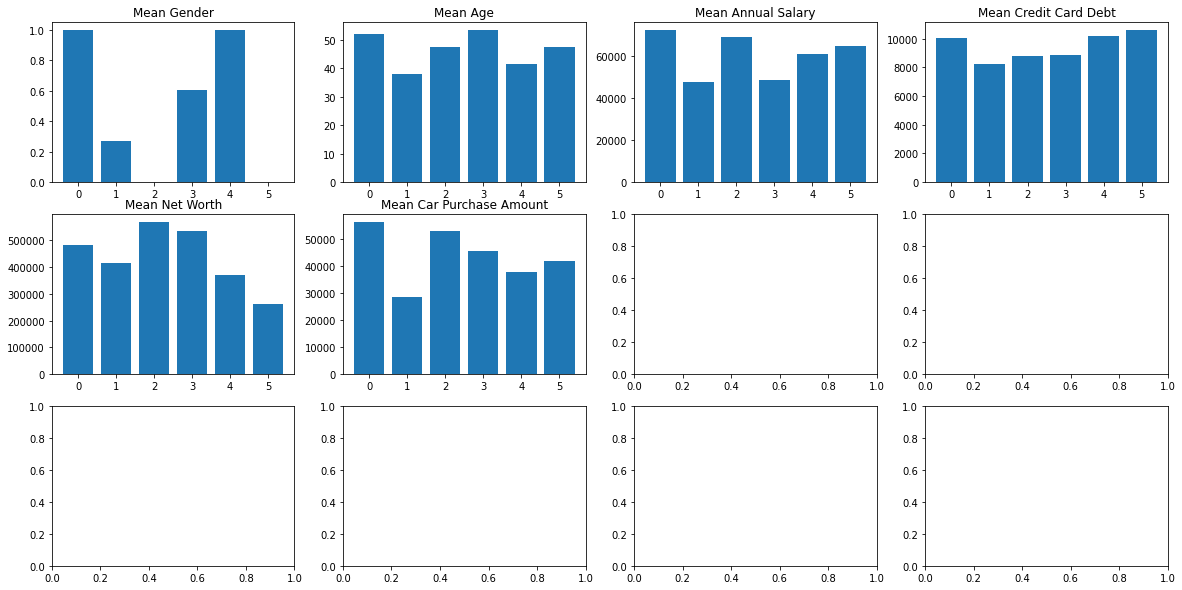

In [29]:
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')



- Cluster 0 and 4 has a higher propertation of average gender than the rest of the clusters. 

- Cluster 3 has a higher average of age than the rest. 

- Relatively all the clusters have a higher propertation of annual salary which can correlate the average price of car being relatively high as well. 

- Credit Card debt also seems to be high across all clusters which can correlate to the high net worth and annual salary. 